In [1]:
%reload_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from source.script import script_settings
script_options = script_settings("<INSERT CONFIG SCRIPT HERE>")

In [3]:
from source.script import setup_simulation

params = setup_simulation(script_options)

[2023-06-05 10:02:33,853 | INFO | source.script] Fetching directory paths
[2023-06-05 10:02:33,855 | WARNING | source.other] The following `1` files/folders already exist:
[2023-06-05 10:02:33,856 | WARNING | source.other] Delete? `meerkat-src-100/config/params.config`


Do you wish to replace it? (y/n) n


[2023-06-05 10:02:35,015 | INFO | source.script] Using saved parameter data
[2023-06-05 10:02:35,021 | INFO | source.script] Creating directory paths
[2023-06-05 10:02:35,022 | INFO | source.script] Making directories
[2023-06-05 10:02:35,026 | INFO | source.script] Setting thread count to 4
[2023-06-05 10:02:35,028 | INFO | source.script] Setting random state seed to 666
[2023-06-05 10:02:35,030 | INFO | source.script] Matplotlib config directory unchanged
[2023-06-05 10:02:35,030 | INFO | source.script] Simulation setup complete


In [4]:
from source.script import all_settings

params, options = all_settings(params)

In [7]:
from source.plotting import setup_plotting

# Setup plotting
setup_plotting(options["plots"], params)

[2023-06-05 10:03:33,962 | INFO | source.plotting] Retrieving plotting options
[2023-06-05 10:03:33,965 | INFO | source.plotting] Updating parameter data


In [7]:
from source.data import create_empty_measurement_set

# Create measurement set
create_empty_measurement_set(options["ms"], params, verbose=True)

[2023-06-05 09:44:48,558 | INFO | source.data] Name/Path: `meerkat-src-100/data/meerkat.ms`
[2023-06-05 09:44:48,560 | INFO | source.data] Telescope: meerkat
[2023-06-05 09:44:48,561 | INFO | source.data] Right Ascension: 11h50m15s
[2023-06-05 09:44:48,563 | INFO | source.data] Declination: -30d27m43s
[2023-06-05 09:44:48,564 | INFO | source.data] Synthesis-Time: 2 hr
[2023-06-05 09:44:48,565 | INFO | source.data] Integration-Time: 10 s
[2023-06-05 09:44:48,566 | INFO | source.data] Initial Frequency: 1GHz
[2023-06-05 09:44:48,568 | WARNING | source.other] The following `1` files/folders already exist:
[2023-06-05 09:44:48,569 | WARNING | source.other] Delete? `meerkat-src-100/data/meerkat.ms`


Do you wish to replace it? (y/n) n


[2023-06-05 09:44:49,738 | INFO | source.data] Keep original measurement set at `meerkat-src-100/data/meerkat.ms`
[2023-06-05 09:44:49,740 | INFO | source.data] Updating path and parameter data


In [8]:
from source.data import create_gains_signal

# Create true gains signal
create_gains_signal(options["gains"], params)

[2023-06-05 09:44:53,264 | INFO | source.data] Setting seed to 666
[2023-06-05 09:44:53,265 | INFO | source.data] Updating path data
[2023-06-05 09:44:53,268 | WARNING | source.other] The following `1` files/folders already exist:
[2023-06-05 09:44:53,269 | WARNING | source.other] Delete? `meerkat-src-100/data/gains/true/true-gains.npz`


Do you wish to replace it? (y/n) n


[2023-06-05 09:44:54,503 | INFO | source.data] Using existing gains
[2023-06-05 09:44:54,504 | INFO | source.data] Updating path and parameter data


In [9]:
from source.data import create_skymodels

# Create sky models
create_skymodels(options["vis"], params)

[2023-06-05 09:44:56,434 | INFO | source.data] Setting seed to 666
[2023-06-05 09:44:56,435 | INFO | source.data] Updating path data
[2023-06-05 09:44:56,437 | INFO | source.data] Fetching skymodel information
[2023-06-05 09:44:56,441 | WARNING | source.other] The following `4` files/folders already exist:
[2023-06-05 09:44:56,443 | WARNING | source.other] Delete? `meerkat-src-100/data/fluxes/true/model-100mp.npz`
[2023-06-05 09:44:56,444 | WARNING | source.other] Delete? `meerkat-src-100/data/fluxes/true/model-75mp.npz`
[2023-06-05 09:44:56,446 | WARNING | source.other] Delete? `meerkat-src-100/data/fluxes/true/model-50mp.npz`
[2023-06-05 09:44:56,447 | WARNING | source.other] Delete? `meerkat-src-100/data/fluxes/true/model-25mp.npz`


Do you wish to replace it? (y/n) n


[2023-06-05 09:44:57,902 | INFO | source.data] Using existing true fluxes


In [10]:
from source.data import create_visibilities

# Create visibilities
create_visibilities(options["vis"], params)

[2023-06-05 09:45:00,302 | INFO | source.data] Setting seed to 666
[2023-06-05 09:45:00,303 | INFO | source.data] Fetching visibility information
[2023-06-05 09:45:00,554 | INFO | source.data] Load the true-gains data
[2023-06-05 09:45:00,560 | INFO | source.data] Generating visibilities
[2023-06-05 09:45:01,858 | INFO | source.data] Saving 100MP visibilities to `meerkat-src-100/data/meerkat.ms`
[2023-06-05 09:45:01,859 | INFO | source.data] Measured Visibilities: 'DATA_100MP'
[2023-06-05 09:45:01,859 | INFO | source.data] Clean Measured Visibilities: 'CLEAN_100MP
[2023-06-05 09:45:01,860 | INFO | source.data] True/Model Visibilities: 'MODEL_100MP
[2023-06-05 09:45:01,861 | INFO | source.data] Noise Term: 'NOISE_100MP
[2023-06-05 09:45:05,362 | INFO | source.data] Saving 75MP visibilities to `meerkat-src-100/data/meerkat.ms`
[2023-06-05 09:45:05,364 | INFO | source.data] Measured Visibilities: 'DATA_75MP'
[2023-06-05 09:45:05,365 | INFO | source.data] Clean Measured Visibilities: 'CLEA

[2023-06-05 10:03:39,199 | INFO | source.plotting] Setting seed to 666
[2023-06-05 10:03:39,202 | WARNING | source.other] The following `1` files/folders already exist:
[2023-06-05 10:03:39,203 | WARNING | source.other] Delete? `meerkat-src-100/plots/ch5-sim-gains.png`


Do you wish to replace it? (y/n) y


[2023-06-05 10:03:40,478 | INFO | source.plotting] Load the true-gains data
[2023-06-05 10:03:40,488 | INFO | source.plotting] Creating plot
[2023-06-05 10:03:40,490 | INFO | source.plotting] Setting up axes and figure
[2023-06-05 10:03:40,584 | INFO | source.plotting] Configuring axes
[2023-06-05 10:03:40,588 | INFO | source.plotting] Figure and axes setup complete
[2023-06-05 10:03:40,588 | INFO | source.plotting] Plotting amplitude and phase signals
[2023-06-05 10:03:40,594 | INFO | source.plotting] Saving figure to `meerkat-src-100/plots/ch5-sim-gains.png`
[2023-06-05 10:03:41,846 | INFO | source.plotting] Displaying amplitude and phase signal plot


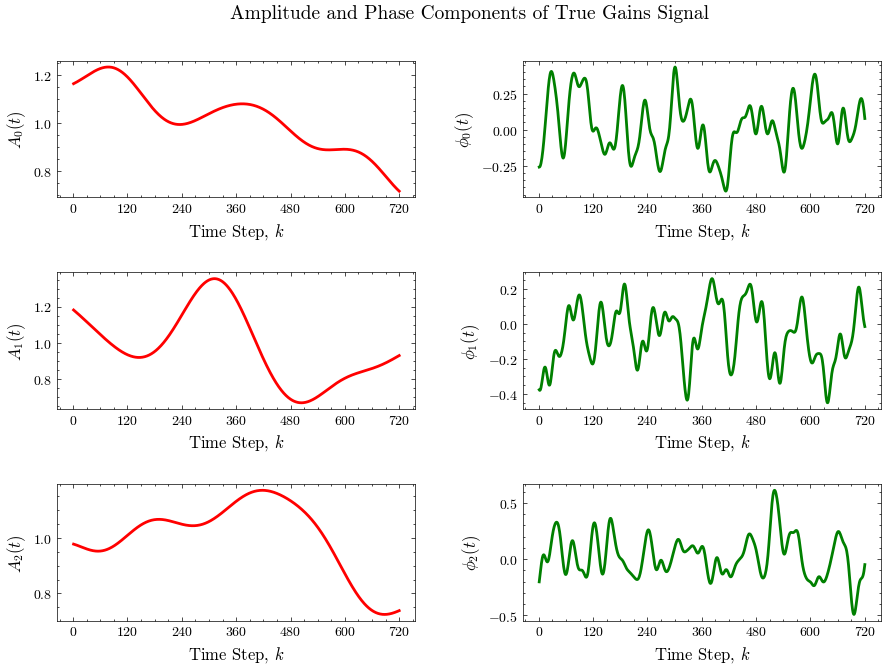

In [8]:
from source.plotting import create_amplitude_and_phase_signal_plot

# Plot amplitude and signal
create_amplitude_and_phase_signal_plot([0, 1, 2], params, show=True)

In [9]:
from source.algorithms import run_kalcal_diag_calibration

run_kalcal_diag_calibration(options["kalcal-diag"], params, progress=True, check_mse=True)

Runs: 0/? [00:00<?, ?it/s]

[2023-06-05 10:04:06,727 | INFO | source.algorithms] Setting seed to 666
[2023-06-05 10:04:06,728 | INFO | source.algorithms] Fetching kalcal-diag calibration run options
[2023-06-05 10:04:06,729 | INFO | source.algorithms] Calculated line search process noise parameters
[2023-06-05 10:04:06,730 | INFO | source.algorithms] Updating path data
[2023-06-05 10:04:06,742 | WARNING | source.algorithms] May take long to start. `numba` is compiling the functions.
[2023-06-05 10:04:06,743 | INFO | source.algorithms] Running line-search on 32 points (128 runs)
[2023-06-05 10:04:06,743 | INFO | source.algorithms] Using interval [1e-4, 1e-2].
[2023-06-05 10:04:12,978 | INFO | source.algorithms] kalcal-diag on 100MP with `sigma_f=1.000e-04`, 6.23s taken, with filter-MSE=0.0759, smoother-MSE=0.0705
[2023-06-05 10:04:13,242 | INFO | source.algorithms] kalcal-diag on 100MP with `sigma_f=1.160e-04`, 0.256s taken, with filter-MSE=0.0759, smoother-MSE=0.0705
[2023-06-05 10:04:13,489 | INFO | source.algor

[2023-06-05 10:04:25,124 | INFO | source.algorithms] kalcal-diag on 75MP with `sigma_f=1.077e-03`, 0.243s taken, with filter-MSE=0.0761, smoother-MSE=0.0703
[2023-06-05 10:04:25,375 | INFO | source.algorithms] kalcal-diag on 75MP with `sigma_f=1.250e-03`, 0.242s taken, with filter-MSE=0.076, smoother-MSE=0.0701
[2023-06-05 10:04:25,624 | INFO | source.algorithms] kalcal-diag on 75MP with `sigma_f=1.450e-03`, 0.24s taken, with filter-MSE=0.0758, smoother-MSE=0.0699
[2023-06-05 10:04:25,886 | INFO | source.algorithms] kalcal-diag on 75MP with `sigma_f=1.682e-03`, 0.254s taken, with filter-MSE=0.0756, smoother-MSE=0.0695
[2023-06-05 10:04:26,132 | INFO | source.algorithms] kalcal-diag on 75MP with `sigma_f=1.951e-03`, 0.238s taken, with filter-MSE=0.0753, smoother-MSE=0.0691
[2023-06-05 10:04:26,388 | INFO | source.algorithms] kalcal-diag on 75MP with `sigma_f=2.264e-03`, 0.244s taken, with filter-MSE=0.0749, smoother-MSE=0.0685
[2023-06-05 10:04:26,645 | INFO | source.algorithms] kalcal-

[2023-06-05 10:04:38,629 | INFO | source.algorithms] kalcal-diag on 25MP with `sigma_f=2.102e-04`, 0.246s taken, with filter-MSE=0.0779, smoother-MSE=0.0729
[2023-06-05 10:04:38,897 | INFO | source.algorithms] kalcal-diag on 25MP with `sigma_f=2.438e-04`, 0.26s taken, with filter-MSE=0.0779, smoother-MSE=0.0729
[2023-06-05 10:04:39,150 | INFO | source.algorithms] kalcal-diag on 25MP with `sigma_f=2.829e-04`, 0.244s taken, with filter-MSE=0.0779, smoother-MSE=0.0729
[2023-06-05 10:04:39,404 | INFO | source.algorithms] kalcal-diag on 25MP with `sigma_f=3.282e-04`, 0.245s taken, with filter-MSE=0.0779, smoother-MSE=0.0728
[2023-06-05 10:04:39,661 | INFO | source.algorithms] kalcal-diag on 25MP with `sigma_f=3.808e-04`, 0.245s taken, with filter-MSE=0.0778, smoother-MSE=0.0728
[2023-06-05 10:04:39,972 | INFO | source.algorithms] kalcal-diag on 25MP with `sigma_f=4.417e-04`, 0.301s taken, with filter-MSE=0.0778, smoother-MSE=0.0728
[2023-06-05 10:04:40,232 | INFO | source.algorithms] kalcal

In [7]:
from source.algorithms import run_kalcal_full_calibration

run_kalcal_full_calibration(options["kalcal-full"], params, progress=True, check_mse=True)

Runs: 0/? [00:00<?, ?it/s]

[2023-06-01 18:22:49,665 | INFO | source.algorithms] Setting seed to 666
[2023-06-01 18:22:49,670 | INFO | source.algorithms] Fetching kalcal-full calibration run options
[2023-06-01 18:22:49,673 | INFO | source.algorithms] kalcal-full is disabled, do nothing
[2023-06-01 18:22:49,676 | INFO | source.algorithms] Updating parameter information


In [8]:
from source.algorithms import run_quartical_calibration

run_quartical_calibration(options["quartical"], params, progress=True, check_mse=True)

Runs: 0/? [00:00<?, ?it/s]

[2023-06-01 18:22:54,689 | INFO | source.algorithms] Setting seed to 666
[2023-06-01 18:22:54,691 | INFO | source.algorithms] Running QuartiCal setup
[2023-06-01 18:22:54,695 | INFO | source.algorithms] Updating path data
[2023-06-01 18:22:54,874 | WARNING | source.other] The following `1` files/folders already exist:
[2023-06-01 18:22:54,875 | WARNING | source.other] Delete? `meerkat-src-100/config/quartical.yml`


Do you wish to replace it? (y/n) y


[2023-06-01 18:22:57,222 | INFO | source.algorithms] Fetching QuartiCal option information
[2023-06-01 18:22:57,520 | INFO | source.algorithms] Creating QuartiCal config
[2023-06-01 18:22:57,542 | INFO | source.algorithms] Updating parameter data
[2023-06-01 18:22:57,711 | INFO | source.algorithms] Calculated line search process noise parameters
[2023-06-01 18:22:57,713 | INFO | source.algorithms] Updating path data
[2023-06-01 18:22:57,767 | INFO | source.algorithms] Running line-search on 240 points (960 runs)
[2023-06-01 18:23:38,916 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=1`, 41.1s taken, with MSE=0.411
[2023-06-01 18:23:46,266 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=2`, 7.31s taken, with MSE=0.206
[2023-06-01 18:23:51,584 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=3`, 5.29s taken, with MSE=0.146
[2023-06-01 18:23:56,900 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=4`, 5.27s taken, with MSE=0.12
[2023-06-01 18:24:0

[2023-06-01 18:28:28,931 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=67`, 3.97s taken, with MSE=0.0475
[2023-06-01 18:28:32,914 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=68`, 3.96s taken, with MSE=0.0471
[2023-06-01 18:28:36,860 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=69`, 3.92s taken, with MSE=0.0493
[2023-06-01 18:28:40,895 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=70`, 4.01s taken, with MSE=0.0509
[2023-06-01 18:28:44,923 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=71`, 4.01s taken, with MSE=0.0508
[2023-06-01 18:28:48,927 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=72`, 3.98s taken, with MSE=0.0502
[2023-06-01 18:28:52,948 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=73`, 4s taken, with MSE=0.0498
[2023-06-01 18:28:56,917 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=74`, 3.95s taken, with MSE=0.0476
[2023-06-01 18:29:00,960 | INFO | source.algorithms] Quarti

[2023-06-01 18:33:08,310 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=137`, 3.92s taken, with MSE=0.0475
[2023-06-01 18:33:12,370 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=138`, 4.04s taken, with MSE=0.0477
[2023-06-01 18:33:16,483 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=139`, 4.09s taken, with MSE=0.0477
[2023-06-01 18:33:20,485 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=140`, 3.98s taken, with MSE=0.0473
[2023-06-01 18:33:24,555 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=141`, 4.05s taken, with MSE=0.0473
[2023-06-01 18:33:28,594 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=142`, 4.02s taken, with MSE=0.0472
[2023-06-01 18:33:32,711 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=143`, 4.09s taken, with MSE=0.0477
[2023-06-01 18:33:36,670 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=144`, 3.94s taken, with MSE=0.0473
[2023-06-01 18:33:40,662 | INFO | source.algorit

[2023-06-01 18:37:46,656 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=206`, 3.86s taken, with MSE=0.0475
[2023-06-01 18:37:50,648 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=207`, 3.97s taken, with MSE=0.0474
[2023-06-01 18:37:54,635 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=208`, 3.97s taken, with MSE=0.0477
[2023-06-01 18:37:58,572 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=209`, 3.91s taken, with MSE=0.0478
[2023-06-01 18:38:02,535 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=210`, 3.94s taken, with MSE=0.048
[2023-06-01 18:38:06,601 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=211`, 4.04s taken, with MSE=0.0483
[2023-06-01 18:38:10,591 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=212`, 3.97s taken, with MSE=0.0485
[2023-06-01 18:38:14,698 | INFO | source.algorithms] QuartiCal on 100MP with `t-int=213`, 4.08s taken, with MSE=0.0487
[2023-06-01 18:38:18,622 | INFO | source.algorith

[2023-06-01 18:42:35,336 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=36`, 3.94s taken, with MSE=0.0477
[2023-06-01 18:42:39,325 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=37`, 3.96s taken, with MSE=0.0459
[2023-06-01 18:42:43,157 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=38`, 3.81s taken, with MSE=0.0433
[2023-06-01 18:42:47,047 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=39`, 3.87s taken, with MSE=0.0458
[2023-06-01 18:42:50,965 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=40`, 3.9s taken, with MSE=0.0456
[2023-06-01 18:42:54,902 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=41`, 3.91s taken, with MSE=0.0435
[2023-06-01 18:42:58,899 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=42`, 3.98s taken, with MSE=0.0462
[2023-06-01 18:43:02,849 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=43`, 3.93s taken, with MSE=0.0435
[2023-06-01 18:43:06,820 | INFO | source.algorithms] QuartiCal on

[2023-06-01 18:47:17,704 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=107`, 3.88s taken, with MSE=0.0432
[2023-06-01 18:47:21,643 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=108`, 3.91s taken, with MSE=0.0439
[2023-06-01 18:47:25,609 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=109`, 3.94s taken, with MSE=0.045
[2023-06-01 18:47:29,737 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=110`, 4.1s taken, with MSE=0.0456
[2023-06-01 18:47:33,702 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=111`, 3.94s taken, with MSE=0.046
[2023-06-01 18:47:37,627 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=112`, 3.9s taken, with MSE=0.0464
[2023-06-01 18:47:41,581 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=113`, 3.93s taken, with MSE=0.046
[2023-06-01 18:47:45,652 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=114`, 4.05s taken, with MSE=0.046
[2023-06-01 18:47:49,674 | INFO | source.algorithms] QuartiCal

[2023-06-01 18:52:01,270 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=177`, 4.19s taken, with MSE=0.0451
[2023-06-01 18:52:05,541 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=178`, 4.25s taken, with MSE=0.0457
[2023-06-01 18:52:09,881 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=179`, 4.32s taken, with MSE=0.0463
[2023-06-01 18:52:13,797 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=180`, 3.89s taken, with MSE=0.0465
[2023-06-01 18:52:17,647 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=181`, 3.83s taken, with MSE=0.0472
[2023-06-01 18:52:21,550 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=182`, 3.88s taken, with MSE=0.0472
[2023-06-01 18:52:25,482 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=183`, 3.91s taken, with MSE=0.0476
[2023-06-01 18:52:29,417 | INFO | source.algorithms] QuartiCal on 75MP with `t-int=184`, 3.91s taken, with MSE=0.0481
[2023-06-01 18:52:33,290 | INFO | source.algorithms] Qua

[2023-06-01 18:56:44,036 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=7`, 4.08s taken, with MSE=0.0823
[2023-06-01 18:56:48,098 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=8`, 4.04s taken, with MSE=0.0755
[2023-06-01 18:56:52,137 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=9`, 4.02s taken, with MSE=0.0725
[2023-06-01 18:56:56,207 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=10`, 4.05s taken, with MSE=0.0687
[2023-06-01 18:57:00,233 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=11`, 4s taken, with MSE=0.0671
[2023-06-01 18:57:04,191 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=12`, 3.93s taken, with MSE=0.0618
[2023-06-01 18:57:08,148 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=13`, 3.93s taken, with MSE=0.0592
[2023-06-01 18:57:13,760 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=14`, 5.58s taken, with MSE=0.0577
[2023-06-01 18:57:17,823 | INFO | source.algorithms] QuartiCal on 50MP

[2023-06-01 19:01:28,259 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=78`, 4.06s taken, with MSE=0.0397
[2023-06-01 19:01:32,301 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=79`, 4.02s taken, with MSE=0.0398
[2023-06-01 19:01:36,284 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=80`, 3.96s taken, with MSE=0.0384
[2023-06-01 19:01:40,370 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=81`, 4.06s taken, with MSE=0.0381
[2023-06-01 19:01:44,388 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=82`, 3.99s taken, with MSE=0.0382
[2023-06-01 19:01:48,292 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=83`, 3.88s taken, with MSE=0.0392
[2023-06-01 19:01:52,246 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=84`, 3.93s taken, with MSE=0.0412
[2023-06-01 19:01:56,259 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=85`, 3.99s taken, with MSE=0.0421
[2023-06-01 19:02:00,271 | INFO | source.algorithms] QuartiCal o

[2023-06-01 19:06:07,012 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=148`, 3.92s taken, with MSE=0.0475
[2023-06-01 19:06:11,036 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=149`, 4s taken, with MSE=0.0472
[2023-06-01 19:06:14,969 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=150`, 3.91s taken, with MSE=0.0465
[2023-06-01 19:06:19,022 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=151`, 4.03s taken, with MSE=0.0466
[2023-06-01 19:06:23,037 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=152`, 3.99s taken, with MSE=0.0465
[2023-06-01 19:06:27,063 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=153`, 4s taken, with MSE=0.0461
[2023-06-01 19:06:31,007 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=154`, 3.92s taken, with MSE=0.0455
[2023-06-01 19:06:34,990 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=155`, 3.96s taken, with MSE=0.0455
[2023-06-01 19:06:39,201 | INFO | source.algorithms] QuartiCal

[2023-06-01 19:10:45,264 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=218`, 3.93s taken, with MSE=0.0466
[2023-06-01 19:10:49,193 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=219`, 3.9s taken, with MSE=0.0468
[2023-06-01 19:10:53,103 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=220`, 3.89s taken, with MSE=0.0472
[2023-06-01 19:10:57,065 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=221`, 3.94s taken, with MSE=0.0474
[2023-06-01 19:11:01,018 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=222`, 3.93s taken, with MSE=0.0474
[2023-06-01 19:11:05,007 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=223`, 3.97s taken, with MSE=0.0473
[2023-06-01 19:11:09,006 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=224`, 3.98s taken, with MSE=0.047
[2023-06-01 19:11:12,978 | INFO | source.algorithms] QuartiCal on 50MP with `t-int=225`, 3.95s taken, with MSE=0.047
[2023-06-01 19:11:17,009 | INFO | source.algorithms] Quarti

[2023-06-01 19:15:40,099 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=49`, 3.95s taken, with MSE=0.0438
[2023-06-01 19:15:44,167 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=50`, 4.05s taken, with MSE=0.0458
[2023-06-01 19:15:48,248 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=51`, 4.06s taken, with MSE=0.0418
[2023-06-01 19:15:52,317 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=52`, 4.05s taken, with MSE=0.0416
[2023-06-01 19:15:56,429 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=53`, 4.09s taken, with MSE=0.0459
[2023-06-01 19:16:00,512 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=54`, 4.06s taken, with MSE=0.0475
[2023-06-01 19:16:04,637 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=55`, 4.1s taken, with MSE=0.0486
[2023-06-01 19:16:08,654 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=56`, 3.99s taken, with MSE=0.0494
[2023-06-01 19:16:12,694 | INFO | source.algorithms] QuartiCal on

[2023-06-01 19:20:23,607 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=119`, 4.18s taken, with MSE=0.0465
[2023-06-01 19:20:27,641 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=120`, 4.01s taken, with MSE=0.0463
[2023-06-01 19:20:31,640 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=121`, 3.98s taken, with MSE=0.0464
[2023-06-01 19:20:35,831 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=122`, 4.17s taken, with MSE=0.046
[2023-06-01 19:20:39,899 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=123`, 4.05s taken, with MSE=0.0455
[2023-06-01 19:20:43,947 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=124`, 4.03s taken, with MSE=0.0444
[2023-06-01 19:20:47,933 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=125`, 3.96s taken, with MSE=0.0438
[2023-06-01 19:20:51,951 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=126`, 3.99s taken, with MSE=0.0438
[2023-06-01 19:20:55,937 | INFO | source.algorithms] Quar

[2023-06-01 19:25:10,538 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=189`, 3.89s taken, with MSE=0.0447
[2023-06-01 19:25:14,448 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=190`, 3.89s taken, with MSE=0.0446
[2023-06-01 19:25:18,358 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=191`, 3.89s taken, with MSE=0.0442
[2023-06-01 19:25:22,352 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=192`, 3.97s taken, with MSE=0.0441
[2023-06-01 19:25:26,319 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=193`, 3.94s taken, with MSE=0.0444
[2023-06-01 19:25:30,207 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=194`, 3.87s taken, with MSE=0.0449
[2023-06-01 19:25:34,146 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=195`, 3.91s taken, with MSE=0.0448
[2023-06-01 19:25:38,054 | INFO | source.algorithms] QuartiCal on 25MP with `t-int=196`, 3.89s taken, with MSE=0.0448
[2023-06-01 19:25:42,007 | INFO | source.algorithms] Qua

In [23]:
from source.imaging import run_quartical_flux_extractor

run_quartical_flux_extractor(params, check_metric=True, progress=True)

0.001783777155501533


In [ ]:
%autoreload now
from source.imaging import run_single_wsclean_imaging

paths = params["paths"]
gains_path = paths["gains"]["true"]
fits_name = "true"

run_single_wsclean_imaging(gains_path, fits_name, params)